In [11]:
# ! pip install llama_index ftfy regex tqdm
# ! pip install git+https://github.com/openai/CLIP.git
# ! pip install torch torchvision
# ! pip install matplotlib scikit-image
# ! pip install -U qdrant_client

In [12]:
import os

OPENAI_API_TOKEN = "sk-..."
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [13]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

input_image_path = Path("input_images")
if not input_image_path.exists():
    Path.mkdir(input_image_path)


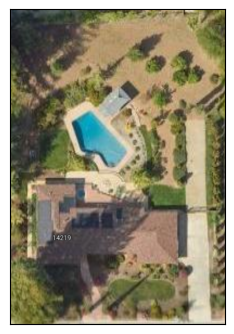

In [14]:
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']

# Filter out non-image files
image_paths = [str(input_image_path / img_path) for img_path in os.listdir(input_image_path) 
               if any(img_path.lower().endswith(ext) for ext in image_extensions)]

def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 6:  # Adjusted to match the subplot dimensions (2,3)
                break

plot_images(image_paths)

In [15]:
## LlamaIndex toturial ##
# from PIL import Image
# import matplotlib.pyplot as plt
# import os

# image_paths = []
# for img_path in os.listdir("./input_images"):
#     image_paths.append(str(os.path.join("./input_images", img_path)))


# def plot_images(image_paths):
#     images_shown = 0
#     plt.figure(figsize=(16, 9))
#     for img_path in image_paths:
#         if os.path.isfile(img_path):
#             image = Image.open(img_path)

#             plt.subplot(2, 3, images_shown + 1)
#             plt.imshow(image)
#             plt.xticks([])
#             plt.yticks([])

#             images_shown += 1
#             if images_shown >= 9:
#                 break


# plot_images(image_paths)

In [16]:
instruction1 = '''
You are an intelligent Accessory Dwelling Units (ADU) architect designer and contractor.
The image I loaded for you is a 2D aerial view of my residential property.
You must follow the following rules to build an ADU for me:
1. Place the ADU at the back of the property, 4 ft from the edge of the property, with a square footage of 220-1200 sq ft.
2. The designed accessory dwelling unit shall not exceed fifty percent of the existing or concurrently approved living area of a single-family dwelling, with a maximum size of one thousand two hundred square feet, not including the garage
Give me the ADU plan for my property.
'''

In [19]:
instruction2 = "Please analyze the image and describe the locations of any pools, properties, and roads present in terms of their position within the image. \
For example, if there is a pool in the top left quarter of the image, describe it as \
bounding box coordinates for each detected object.\
"


In [28]:
instruction3 = '''
You are an intelligent Accessory Dwelling Units (ADU) architect designer and contractor.
Please analyze the image, describle the layout, and then describe the location of any pool, property, and driveways in the\
format of:
1. property: xxx
2. pool: xxx
...
'''

In [29]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./input_images").load_data()

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500, temperature = 0.0
)

response_1 = openai_mm_llm.complete(
    prompt = instruction3,
    image_documents=image_documents,
)

print(response_1)

Based on the aerial image provided, here is an analysis of the layout:

1. Property: The property appears to be a residential lot with a single-family home. The house has a hipped roof with multiple sections, indicating a complex floor plan with possibly several rooms or wings. There is a landscaped area surrounding the house with various trees and shrubs, and the terrain seems to be sloped, as indicated by the terracing on the land.

2. Pool: There is a kidney-shaped pool located to the northwest of the main house. It is surrounded by a paved area, likely for lounging and poolside activities, and is accessible via a curved pathway that leads from the house to the pool area.

3. Driveways: It is not entirely clear from the image where the driveway is located, as the specific access point to the property is not visible. However, there seems to be a paved path leading from the bottom right of the image towards the house, which could be the driveway or a walkway. If it is the driveway, it